# 衡量线性回归的指标

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X  = boston.data[:, 5]  # 只使用房间数量这个特征

In [5]:
X.shape

(506,)

In [6]:
y = boston.target
y.shape

(506,)

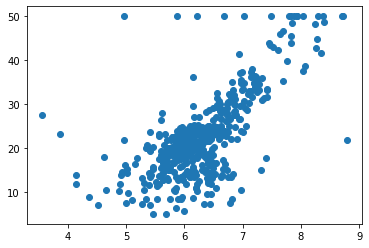

In [7]:
plt.scatter(X, y)
plt.show()

In [8]:
np.max(y)

50.0

In [9]:
X = X[y < 50.0]
y = y[y < 50.0]

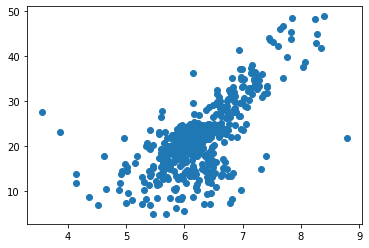

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =666)

In [12]:
X_train.shape

(367,)

In [13]:
X_test.shape

(123,)

In [14]:
%run SimpleLinearRegression2.py

In [15]:
reg = SimpleLinearRegression02 ()
reg.fit(X_train, y_train)

SimpleLinearRegression1()

In [16]:
reg.a_

7.833972917686116

In [17]:
reg.b_

-27.25275526687991

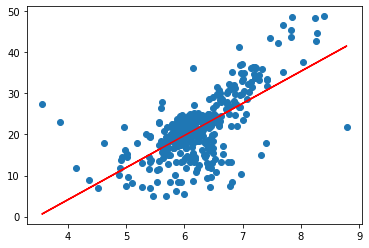

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), 'r')
plt.show()

In [19]:
y_predict = reg.predict(X_test)

---
## 1.MSE 均方误差
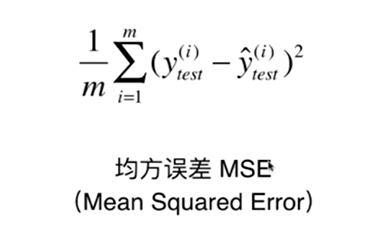

In [20]:
# MSE
mse_test = np.sum((y_predict - y_test)**2 / len(y_test))
mse_test

28.215949368640803

---
## 2.RMSE 均方根误差
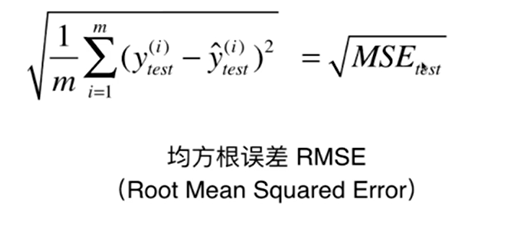

In [21]:
# RMSE
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.311868726600913

---
## 3.MAE 平均绝对误差
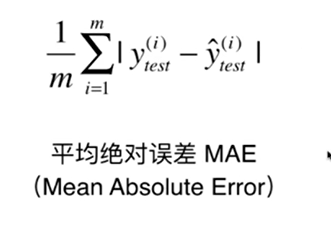

In [22]:
# MAE
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.9489046062737834

## 4.scikit-learn中的MSE和MAE

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
mean_squared_error(y_test, y_predict)

28.215949368640807

In [25]:
mean_absolute_error(y_test, y_predict)

3.9489046062737834